<a href="https://colab.research.google.com/github/Rohan171819/Deep_Learning_Projects./blob/main/Human_vs_Monkeys_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG 16

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
train_ds="/content/drive/MyDrive/MonkeyVs Human Data/Training_Data"
test_ds="/content/drive/MyDrive/MonkeyVs Human Data/Validation_Data"

In [18]:
conv_base=VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3)
)

In [19]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [20]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               4194432   
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 18942401 (72.26 MB)
Trainable params: 18942401 (72.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Freezing the Convolution layers from training...
conv_base.trainable=False

In [23]:
from keras.src.utils.image_dataset import image_dataset_from_directory
# Generators...
train_ds=image_dataset_from_directory(
    directory="/content/drive/MyDrive/MonkeyVs Human Data/Training_Data",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    shuffle=True,
    image_size=(256,256)
)

test_ds=image_dataset_from_directory(
    directory="/content/drive/MyDrive/MonkeyVs Human Data/Validation_Data",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    shuffle=True,
    image_size=(256,256)
)

Found 6121 files belonging to 2 classes.
Found 2511 files belonging to 2 classes.


In [24]:
# Normalization...
def process(image,label):
  image=tensorflow.cast(image/255.,tensorflow.float32)
  return image,label

train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [25]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [26]:
history=model.fit(train_ds,epochs=5,validation_data=test_ds)

Epoch 1/5
192/192 [==============================] - 179s 843ms/step - loss: 0.0466 - accuracy: 0.9832 - val_loss: 0.0142 - val_accuracy: 0.9948
Epoch 2/5
192/192 [==============================] - 159s 804ms/step - loss: 9.3911e-04 - accuracy: 0.9997 - val_loss: 0.2201 - val_accuracy: 0.9434
Epoch 3/5
192/192 [==============================] - 154s 769ms/step - loss: 1.9755e-04 - accuracy: 1.0000 - val_loss: 0.0266 - val_accuracy: 0.9920
Epoch 4/5
192/192 [==============================] - 152s 771ms/step - loss: 2.9437e-05 - accuracy: 1.0000 - val_loss: 0.0409 - val_accuracy: 0.9881
Epoch 5/5
192/192 [==============================] - 155s 782ms/step - loss: 1.9489e-05 - accuracy: 1.0000 - val_loss: 0.0384 - val_accuracy: 0.9888


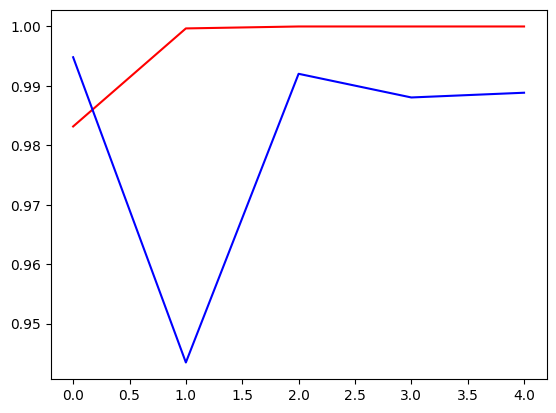

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color="red")
plt.plot(history.history["val_accuracy"],color="blue")
plt.show()

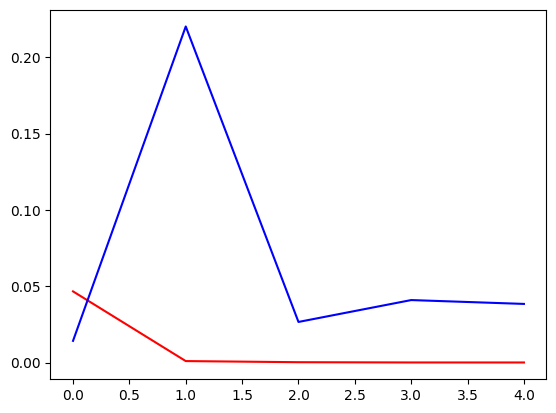

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],color="red")
plt.plot(history.history["val_loss"],color="blue")
plt.show()

# Testing the Model.

In [29]:
import cv2

In [34]:
test_img=cv2.imread("/content/Human.jpg")

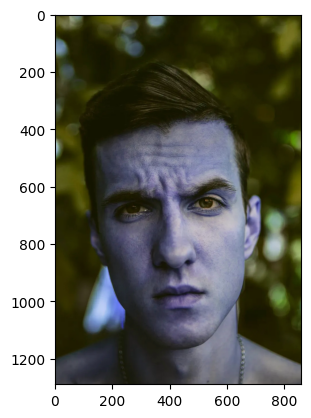

In [35]:
plt.imshow(test_img)

In [36]:
test_img.shape

(1290, 860, 3)

In [38]:
test_img=cv2.resize(test_img,(256,256))

In [39]:
test_input=test_img.reshape(1,256,256,3)

In [40]:
model.predict(test_input)

1/1 [==============================] - 1s 1s/step


array([[0.]], dtype=float32)

In [41]:
test2_img=cv2.imread("/content/Monkey.jpg")

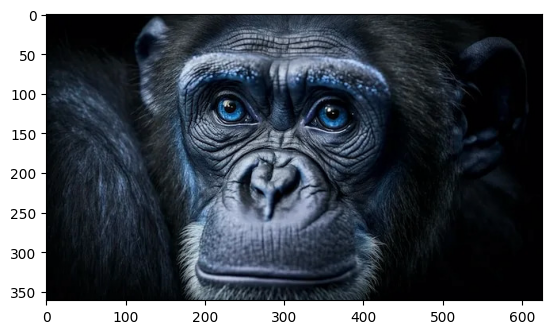

In [42]:
plt.imshow(test2_img)

In [43]:
test2_img=cv2.resize(test2_img,(256,256))

In [44]:
test2_input=test2_img.reshape(1,256,256,3)

In [46]:
model.predict(test2_input)

1/1 [==============================] - 0s 100ms/step


array([[0.]], dtype=float32)